In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn.preprocessing import MinMaxScaler
import os
import random

In [68]:
def set_seed(seed: int):
    random.seed(seed) # Python
    np.random.seed(seed)  # Numpy, é o gerador utilizado pelo sklearn
    os.environ["PYTHONHASHSEED"] = str(seed)  # sistema operativo

set_seed(25)

In [69]:
# Load dataset
radi = pd.read_csv("../prep5/train_full_prep5.csv")

In [70]:
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

# Estado vai ser comum para todos os modelos, 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=25)


Best RandomForest Model Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'n_estimators': 55}
0.3604002963072208


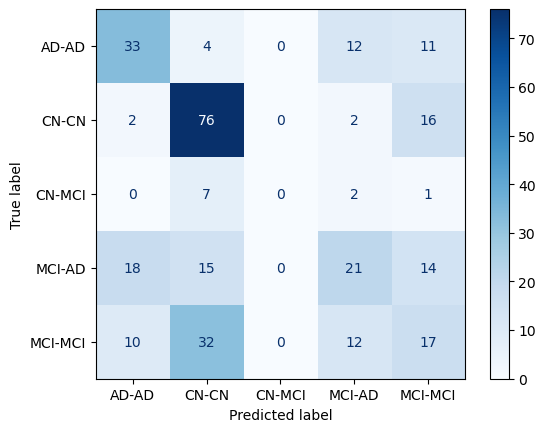

In [71]:
# Split data into features and target
df = radi.copy()
X = df.drop(columns=["Transition"])
y = df["Transition"]

# Params Definition
"""
rf_params = {"n_estimators": [100,300,500],
             "max_depth": [5, 10, 20, None],
             "criterion" :["gini","entropy"],
             "max_features":["sqrt","log2", None]     
             }
            "55"
             "20"
             "gini"
             "None"
             0.3604002963072208

"""

rf_params = {"n_estimators": [55],
             "max_depth": [20],
             "criterion" :["gini"],
             "max_features":[None],
             }

            
rf_model = RandomForestClassifier(random_state=2025)

# model, params, scoring using f1, 5 folds, full processor
rf_grid = GridSearchCV(rf_model, rf_params, scoring='f1_macro', cv=skf, n_jobs=-1)
rf_grid.fit(X,y)
print(f"Best RandomForest Model Parameters: {rf_grid.best_params_}")
f1_scores = cross_val_score(rf_grid.best_estimator_,X,y,cv=skf,scoring="f1_macro")
print(f1_scores.mean())

y_pred = cross_val_predict(rf_grid.best_estimator_, X, y, cv=skf)
y_pred = cross_val_predict(vt_model, X, y, cv=skf)
accuracy = accuracy_score(y, y_pred)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_grid.best_estimator_.classes_)
disp.plot(cmap="Blues")

In [75]:
test_data = pd.read_csv("../prep5/test_processed_prep5.csv")
# Generate predictions using the RandomForest model
rf_predictions_test = rf_grid.best_estimator_.predict(test_data)
# Store the results in a DataFrame and save to CSV
res1 = pd.DataFrame({
    'RowId': range(1, len(rf_predictions_test) + 1),
    'Result': rf_predictions_test
})
res1.to_csv("RandomForestExploitation5.0.csv",index=False)

In [ ]:
# Split data into features and target
df = radi.copy()
X = df.drop(columns=["Transition"])
y = df["Transition"]

# Params Definition
"""
rf_params = {"n_estimators": [100,300,500],
             "max_depth": [5, 10, 20, None],
             "criterion" :["gini","entropy"],
             "max_features":["sqrt","log2", None]     
             }
            "55"
             "20"
             "gini"
             "None"
             0.3604002963072208

"""

rf_params = {"n_estimators": [50],
             "max_depth": [20],
             "criterion" :["gini"],
             "max_features":[None],
             }

            
rf_model = RandomForestClassifier(random_state=2025)

# model, params, scoring using f1, 5 folds, full processor
rf_grid = GridSearchCV(rf_model, rf_params, scoring='f1_macro', cv=skf, n_jobs=-1)
rf_grid.fit(X,y)
print(f"Best RandomForest Model Parameters: {rf_grid.best_params_}")
f1_scores = cross_val_score(rf_grid.best_estimator_,X,y,cv=skf,scoring="f1_macro")
print(f1_scores.mean())

y_pred = cross_val_predict(rf_grid.best_estimator_, X, y, cv=skf)
y_pred = cross_val_predict(vt_model, X, y, cv=skf)
accuracy = accuracy_score(y, y_pred)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_grid.best_estimator_.classes_)
disp.plot(cmap="Blues")

Best SVM Model Parameters: {'C': 20, 'gamma': 'auto', 'kernel': 'rbf', 'tol': 0.001}
0.3504618631192396


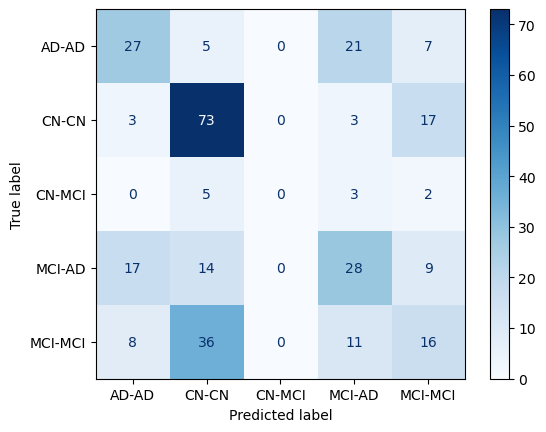

In [72]:
from sklearn.svm import SVC

df = radi.copy()
X = df.drop(columns=["Transition"]) 
y = df["Transition"]

"""
# Define the parameter grid for SVC
param_grid = {
    'C': [1, 10, 100,1000],              # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly','sigmoid','precomputed'],  # Kernel types ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
    'gamma': ['scale', 'auto'],           # Kernel coefficient for 'rbf' and 'poly' kernels
}
    "100"
    "sigmoid"
    "scale"
0.3504618631192396
"""

param_grid = {
    'C': [1,5,10,20,50,100,1000],      
    'kernel': ['linear', 'rbf', 'poly','sigmoid'], 
    'gamma': ['scale', 'auto'],
    'tol':[0.001],
}

# Initialize the SVC model
svm_model = SVC(random_state=2025, probability=True)

svm_grid = GridSearchCV(svm_model,param_grid, 
                           cv=skf, scoring='f1_macro', n_jobs=-1)

svm_grid.fit(X, y)
print(f"Best SVM Model Parameters: {svm_grid.best_params_}")
f1_scores = cross_val_score(svm_grid.best_estimator_,X,y,cv=skf,scoring="f1_macro")
print(f1_scores.mean())
y_pred = cross_val_predict(svm_grid.best_estimator_, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_grid.best_estimator_.classes_)
disp.plot(cmap="Blues")

0.33309312336300595
Accuracy from cross_val_predict: 0.4557377049180328


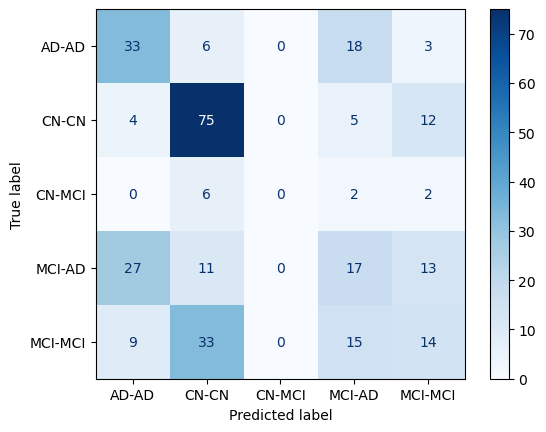

In [65]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

df = radi.copy()
X = df.drop(columns=["Transition"]) 
y = df["Transition"]

estimators = [("svm", svm_grid.best_estimator_), ("rf", rf_grid.best_estimator_)]
vt_model = VotingClassifier(estimators=estimators, voting = 'hard', weights = [2,3],n_jobs=-1) 
vt_model.fit(X,y)
f1_scores = cross_val_score(vt_model,X,y,cv=skf,scoring="f1_macro")
print(f1_scores.mean())
y_pred = cross_val_predict(vt_model, X, y, cv=skf)
accuracy = accuracy_score(y, y_pred)
print("Accuracy from cross_val_predict:", accuracy)

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=vt_model.classes_)
disp.plot(cmap="Blues")

In [63]:
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN

# Initial setup
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=25)
df = radi.copy()
X = df.drop(columns=["Transition"]) 
y = df["Transition"]


class_counts = Counter(y)
print(class_counts)

smote = SMOTE(sampling_strategy={
    'CN-CN': 96,  # Keep majority class as is
    'MCI-MCI': 85,
    'MCI-AD': 85,
    'AD-AD': 80,
    'CN-MCI': 15  # Increase significantly but not to the majority level
}, random_state=25)

X_final,y_final=smote.fit_resample(X, y)


class_counts = Counter(y_final)
print(class_counts)

"""
df = radi.copy()
X = df.drop(columns=["Transition"]) 
y = df["Transition"]

estimators = [("svm", svm_grid.best_estimator_), ("rf", rf_grid.best_estimator_)]
vt_model = VotingClassifier(estimators=estimators, voting = 'hard', weights = [2,3],n_jobs=-1) 
vt_model.fit(X,y)
f1_scores = cross_val_score(vt_model,X,y,cv=skf,scoring="f1_macro")
print(f1_scores.mean())
y_pred = cross_val_predict(vt_model, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=vt_model.classes_)
disp.plot(cmap="Blues")
"""

Counter({'CN-CN': 96, 'MCI-MCI': 71, 'MCI-AD': 68, 'AD-AD': 60, 'CN-MCI': 10})
Counter({'CN-CN': 96, 'MCI-AD': 85, 'MCI-MCI': 85, 'AD-AD': 80, 'CN-MCI': 15})


'\ndf = radi.copy()\nX = df.drop(columns=["Transition"]) \ny = df["Transition"]\n\nestimators = [("svm", svm_grid.best_estimator_), ("rf", rf_grid.best_estimator_)]\nvt_model = VotingClassifier(estimators=estimators, voting = \'hard\', weights = [2,3],n_jobs=-1) \nvt_model.fit(X,y)\nf1_scores = cross_val_score(vt_model,X,y,cv=skf,scoring="f1_macro")\nprint(f1_scores.mean())\ny_pred = cross_val_predict(vt_model, X, y, cv=skf)\ncm = confusion_matrix(y, y_pred)\ndisp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=vt_model.classes_)\ndisp.plot(cmap="Blues")\n'